# Ultimate Inc. Challenge

## Part 1 - Exploratory Data Analysis

### Import Libraies

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

C:\Users\dshaw\AppData\Local\Temp\ipykernel_70140\536812815.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
import json

file = 'logins.json'

with open(file, 'r') as f:  
    logins = json.load(f)  

print(logins)

{'login_time': ['1970-01-01 20:13:18', '1970-01-01 20:16:10', '1970-01-01 20:16:37', '1970-01-01 20:16:36', '1970-01-01 20:26:21', '1970-01-01 20:21:41', '1970-01-01 20:12:16', '1970-01-01 20:35:47', '1970-01-01 20:35:38', '1970-01-01 20:47:52', '1970-01-01 20:26:05', '1970-01-01 20:31:03', '1970-01-01 20:34:46', '1970-01-01 20:36:34', '1970-01-01 20:39:25', '1970-01-01 20:40:37', '1970-01-01 20:34:58', '1970-01-01 20:43:59', '1970-01-01 20:47:46', '1970-01-01 20:46:34', '1970-01-01 20:56:07', '1970-01-01 20:49:12', '1970-01-01 20:59:06', '1970-01-01 20:59:59', '1970-01-01 21:15:01', '1970-01-01 21:09:24', '1970-01-01 21:19:24', '1970-01-01 21:20:53', '1970-01-01 21:29:19', '1970-01-01 21:58:05', '1970-01-01 21:51:51', '1970-01-01 21:59:40', '1970-01-01 22:08:34', '1970-01-01 22:02:51', '1970-01-01 21:58:32', '1970-01-01 22:02:31', '1970-01-01 22:05:32', '1970-01-01 22:02:46', '1970-01-01 22:10:28', '1970-01-01 22:11:58', '1970-01-01 22:01:05', '1970-01-01 22:19:10', '1970-01-01 22:16:

In [3]:
# inspect keys
logins.keys()

dict_keys(['login_time'])

In [4]:
# how long is the data
print(len(logins['login_time']))

93142


In [5]:
# create dataframe
df_logins = pd.DataFrame(pd.to_datetime(logins['login_time']),columns=['login_time'])
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
# check for na values
df_logins[df_logins['login_time'].isna()].shape

(0, 1)

In [8]:
# add count column for resample
df_logins['count'] = 1
# set login time as index for resampling
df_logins.index = df_logins['login_time']
# drop redundant column
df_logins.drop('login_time',axis=1,inplace=True)
df_logins.tail()

,count
login_time,
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1
1970-04-13 18:57:38,1
1970-04-13 18:54:23,1


<Axes: xlabel='login_time'>

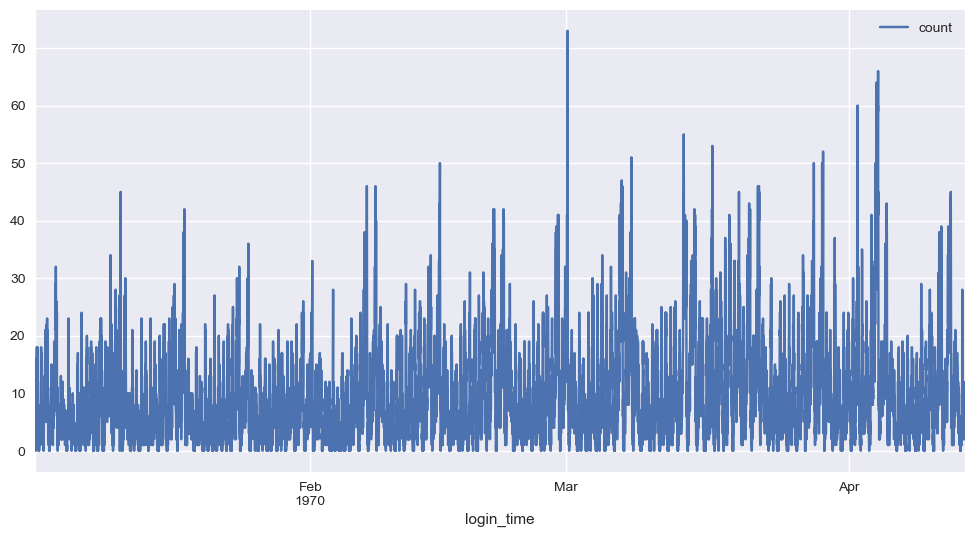

In [9]:
# Resample the data by 15-minute intervals and sum
df_count = df_logins.resample('15min').sum()
df_count.plot(kind='line',figsize=(12,6))

When we plot the 15-minute intervals over the 4-month period, we can see a sinusoidal pattern with the average value gradually increasing.

In [10]:
df_count.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [11]:
# Create a new column 'month_day' with the day of the month
df_count = df_count.assign(month_day=df_count.index.day)

#Create a new column 'weekday' with the weekday (0=Monday, 1=Tuesday, ..., 6=Sunday)
df_count = df_count.assign(weekday=df_count.index.weekday)

# Display the first few rows of the DataFrame
df_count.head()

,count,month_day,weekday
login_time,,,
1970-01-01 20:00:00,2,1,3
1970-01-01 20:15:00,6,1,3
1970-01-01 20:30:00,9,1,3
1970-01-01 20:45:00,7,1,3
1970-01-01 21:00:00,1,1,3


In [12]:
# Calculate the 99th percentile of the 'count' column
spike = np.quantile(df_count['count'], 0.99)

# Filter rows with values greater than or equal to the 99th percentile
df_spike = df_count[df_count['count'] >= spike]

# Extract day of the month and weekday for each spike
month_days = [date.day for date in df_spike.index]
weekdays = [date.weekday() for date in df_spike.index]

# Create DataFrames for the days and weekdays
df_spike_days = pd.DataFrame(month_days, columns=['day'])
df_spike_weekdays = pd.DataFrame(weekdays, columns=['weekday'])

# Combine the two DataFrames
df_spike_combined = pd.concat([df_spike_days, df_spike_weekdays], axis=1)

# Display the combined DataFrame
df_spike_combined.head(10)

,day,weekday
0,11,6
1,18,6
2,18,6
3,6,4
4,7,5
5,7,5
6,8,6
7,8,6
8,15,6
9,15,6


In [13]:
df_spike_days.day.value_counts()[0:10]

day
4     18
22     9
29     9
7      7
8      7
21     7
1      6
15     6
28     6
13     5
Name: count, dtype: int64

In [14]:
df_spike_weekdays.weekday.value_counts()

weekday
6    46
5    42
4    13
1     3
2     2
3     1
Name: count, dtype: int64

The spikes in user logins mostly happen on the weekends, which is probably because a lot of people use ride-share apps to go to parties or bars, places people typically visit on weekends.

<Axes: xlabel='login_time'>

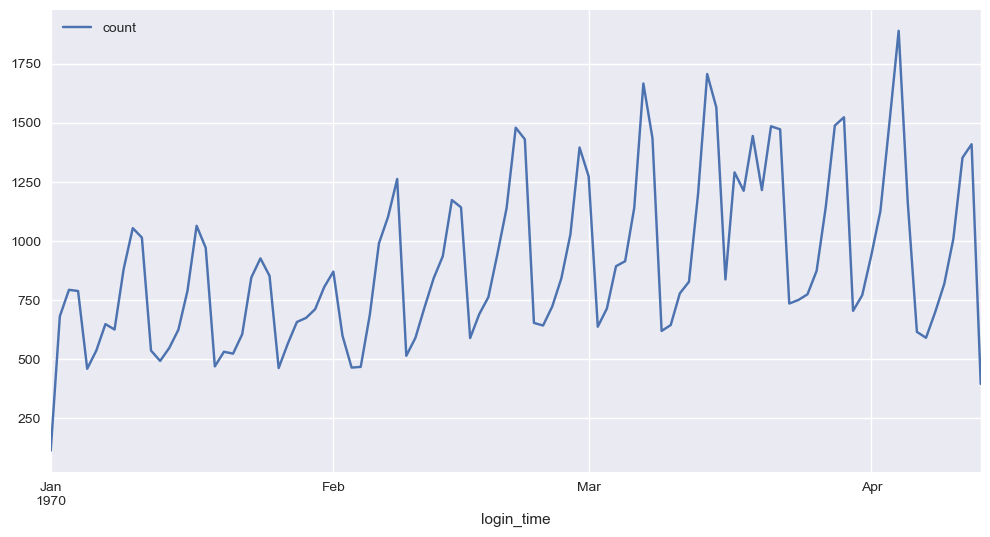

In [15]:
#resample to daily frequency
df_day = df_logins.resample('1D').sum()

# Plot the resampled data
df_day.plot(kind='line',figsize=(12,6))

Resampling to a daily frequency reveals an upward trend in the average number of logins. Initially, throughout January, the average daily logins remain relatively stable, but an increasing trend begins in February. Linear model plots will help confirm or refute this observation.



Text(0.5, 28.99999999999998, 'Day')

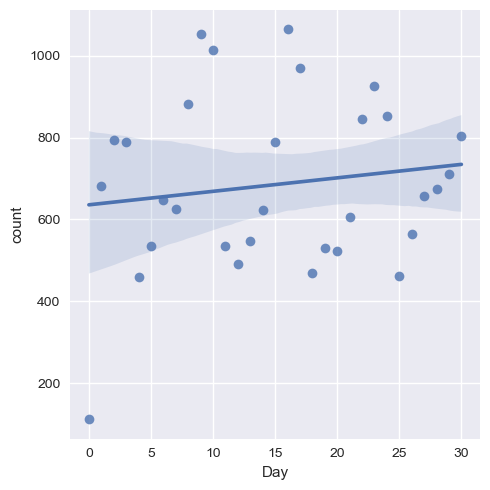

In [16]:
# Filter data for January
plot_df = df_day[df_day.index.month == 1]

# Add a new column 'x' with values as a sequence of numbers corresponding to each day
plot_df = plot_df.assign(x=range(plot_df.shape[0]))

# Plot a linear regression model between 'x' (days) and 'count' (login count)
sns.lmplot(data=plot_df, x='x', y='count')

# Label the x-axis
plt.xlabel('Day')

Looking at the bootstrap confidence interval generated by Seaborn, it's clear that there's no consistent trend, some of the bootstrap correlation coefficients are positive, and some are negative. This suggests that January doesn't show a clear upward trend. Let's now check out the other months to see if there's any noticeable pattern.

Text(0.5, 28.99999999999998, 'Day')

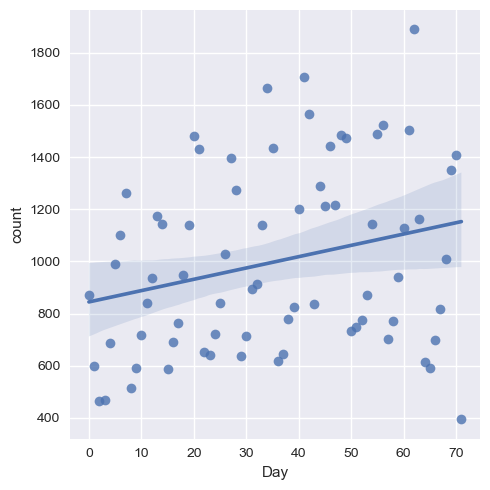

In [17]:
# Plot the trend for February to April
plot_df = df_day[df_day.index.month != 1]  # Filter out January data
plot_df = plot_df.assign(x = range(plot_df.shape[0]))  # Assign sequential day numbers

# Plot with linear regression
sns.lmplot(data=plot_df, x='x', y='count')

# Label the x-axis
plt.xlabel('Day')

It’s clear that there’s an upward trend in user logins from February through April.

## Part 2 -  Experiment and metrics design

1. For this experiment, the key measure of success should be the number of driver partners serving both cities (Gotham and Metropolis) over the course of the experiment.The primary goal of the experiment is to encourage driver partners to be available in both cities. The most direct measure of success would be the number of drivers who choose to serve both cities. If the experiment is successful, you would expect an increase in the number of driver partners crossing the toll bridge and operating in both cities. By reimbursing toll costs, the experiment aims to remove a financial barrier. The success of this effort can be quantified by looking at whether drivers are now more likely to serve both cities, indicating that the reimbursement effectively incentivized this behavior.

2. a) A randomized control trial (RCT) would be an ideal experimental design to assess the effectiveness of reimbursing toll costs in motivating driver partners to serve both Gotham and Metropolis.In the experiment, participants will be randomly divided into two groups. The Treatment Group will receive toll reimbursements for driving between Gotham and Metropolis during the study period.In contrast, the Control Group will not receive any toll reimbursements and will carry out their usual operations without any changes. This random assignment will help ensure that any differences in behavior between the two groups can be attributed to the toll reimbursement intervention.The key to an RCT is randomizing participants to avoid any biases or confounding factors. Randomization will ensure that differences in behavior are attributed to the intervention (toll reimbursement) and not other factors.The experiment will run for 5 weeks, giving enough time to see how driver behavior changes on weekdays and weekends.

2. b) To verify the significance of the observation We will compare the number of drivers serving both cities before and after the experiment within both the treatment and control groups.The null hypothesis is that there is no difference in the number of drivers serving both cities, i.e., the toll reimbursement does not affect the behavior of drivers.
    If we find significant differences in the treatment group, we will compare the change in number of drivers between the treatment and control groups.The null hypothesis is that there is no difference in the number of drivers between the two groups after the intervention.This test will help us determine if the toll reimbursement program is more effective in encouraging drivers in the treatment group to serve both cities compared to the control group.

2. c) If the treatment group shows a significant increase in the number of drivers serving both cities compared to the control group, we can conclude that the toll reimbursement program successfully encouraged more drivers to operate in both cities. In this case, we would recommend expanding the program to all drivers or introducing additional incentives, such as bonuses or priority scheduling, to further promote cross-city driving. However, if there is no significant difference between the two groups, it suggests that the toll reimbursement did not effectively influence driver behavior. Potential reasons could include the reimbursement being too small to drive change, drivers not being interested in operating in the other city, or other external factors (like competing incentives or barriers) affecting their decisions. If this is the case, the city operations team could consider increasing the reimbursement amount or offering alternative incentives, such as higher pay for cross-city trips or longer-distance rides.

## Part 3

In [18]:
### load data

In [19]:
#import data from json file
file = 'ultimate_data_challenge.json'
with open(file) as f:
    data = json.loads(f.read())
df = pd.DataFrame(data)

In [20]:
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [21]:
#inspect dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
# Calculate the percentage distribution of 'trips_in_first_30_days' column
df_tripcounts = df['trips_in_first_30_days'].value_counts(normalize=True) * 100

# Display the top 7 percentages
df_tripcounts.head(7)

trips_in_first_30_days
0    30.780
1    28.216
2    14.804
3     7.576
4     5.124
5     3.232
6     2.268
Name: proportion, dtype: float64

In [23]:
# Calculate the percentage of drivers retained (who have 1 or more trips)
retained_percentage = np.sum(df_tripcounts[1:])

# Display the result
print(f"Percentage of retained drivers: {retained_percentage:.2f}%")

Percentage of retained drivers: 69.22%


In [24]:
# Drop rows where 'phone' column is NaN
df = df.drop(df[df.phone.isna() == True].index, axis=0)

# Display the DataFrame information after dropping missing phone entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    41578 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [25]:
df['avg_rating_by_driver'].describe()

count    49406.000000
mean         4.777861
std          0.447114
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [26]:
df['avg_rating_of_driver'].describe()

count    41578.000000
mean         4.601467
std          0.617377
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [27]:
# Calculate the fill value as the average of 4.777861 and 5
fill_val = (4.777861 + 5) / 2

# Fill missing values in 'avg_rating_by_driver' with the calculated fill value
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(value=fill_val)

# Fill missing values in 'avg_rating_of_driver' with the value 4.9
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(value=4.9)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


## Feature Engineering

In [29]:
# convert to timestamp
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [30]:
# set current date 
current_date = df['last_trip_date'].max()

In [31]:
# Apply the lambda function to determine if the driver is active
df['active'] = df['last_trip_date'].apply(lambda date: 0 if (current_date - date).days > 30 else 1)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [32]:
# Calculate the percentage of active drivers
active_drivers = df['active'].sum()  # Count active drivers (1's)

# Total number of drivers
total_drivers = df.shape[0]  
active_percentage = (active_drivers / total_drivers) * 100

# Output the result
print(f"Percentage of active drivers in the last 30 days: {active_percentage:.2f}%")

Percentage of active drivers in the last 30 days: 37.64%


Only 37.6% of users are active at the end of the six month period.

## Random Forest Classifier

In [33]:
# Create dummy variables for categorical features
df_features = pd.get_dummies(df, columns=['city', 'phone', 'ultimate_black_user'])

# Show the first few rows of the updated dataframe
print(df_features.head())

# Set the target variable 'active' and drop columns that are not useful
target = df_features['active']  # The target column to predict
df_features = df_features.drop(['last_trip_date', 'signup_date', 'active'], axis=1)  # Drop non-useful columns

# Display the first few rows of the final features dataframe
print(df_features.head())

   trips_in_first_30_days signup_date  avg_rating_of_driver  avg_surge  \
0                       4  2014-01-25                   4.7       1.10   
1                       0  2014-01-29                   5.0       1.00   
2                       3  2014-01-06                   4.3       1.00   
3                       9  2014-01-10                   4.6       1.14   
4                      14  2014-01-27                   4.4       1.19   

  last_trip_date  surge_pct  weekday_pct  avg_dist  avg_rating_by_driver  \
0     2014-06-17       15.4         46.2      3.67                   5.0   
1     2014-05-05        0.0         50.0      8.26                   5.0   
2     2014-01-07        0.0        100.0      0.77                   5.0   
3     2014-06-29       20.0         80.0      2.36                   4.9   
4     2014-03-15       11.8         82.4      3.13                   4.9   

   active  city_Astapor  city_King's Landing  city_Winterfell  phone_Android  \
0       1         

<Axes: xlabel='active', ylabel='avg_dist'>

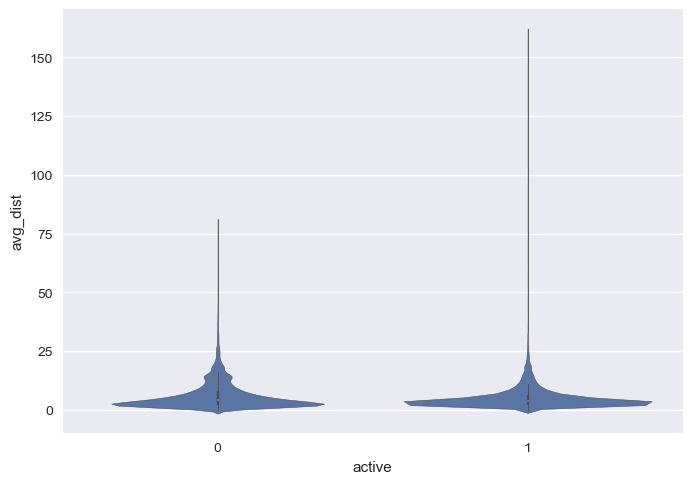

In [34]:
# Visualize difference in average distance by activity of user
sns.violinplot(data=df,x='active',y='avg_dist')

In [35]:
# Apply 'mean' and 'std' (standard deviation) as aggregation functions on the 'avg_dist' column
pd.pivot_table(df, index='active', aggfunc={'avg_dist': ['mean', 'std']})

avg_dist          
            mean       std
active                    
0       6.190725  6.184010
1       5.113930  4.617779

Active users and inactive users have different average trip distances in the first 30 days. This difference is key for predictive modeling.

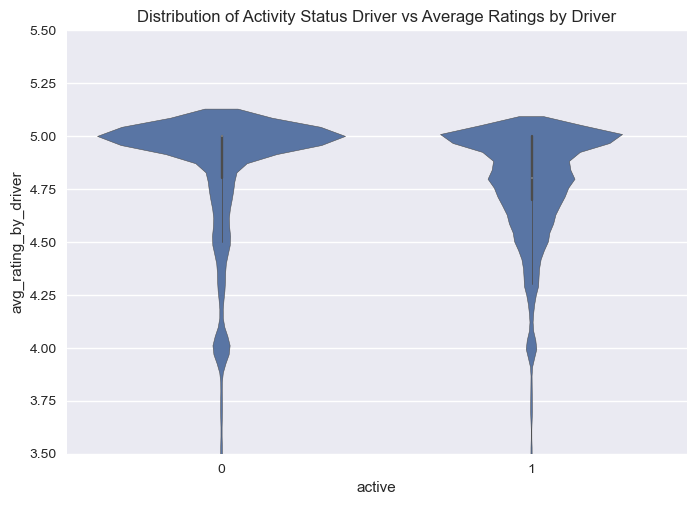

In [36]:
# Create a violin plot for 'avg_rating_by_driver' vs 'active' column
sns.violinplot(data=df, x='active', y='avg_rating_by_driver')

# Set the y-axis limits to be between 3.5 and 5.5
plt.ylim([3.5, 5.5])

# Set the title of the plot
plt.title('Distribution of Activity Status Driver vs Average Ratings by Driver')

# Display the plot
plt.show()

In [37]:
pd.pivot_table(df,index='active',aggfunc={'avg_rating_by_driver':['median','std']})

avg_rating_by_driver          
                     median       std
active                               
0                       5.0  0.503901
1                       4.8  0.328753

Active users have lower ratings than inactive ones. This could be due to active users taking more trips, increasing their chances of receiving a rating of less than 5. In terms of predictive modeling, this feature looks very useful.

In [38]:
pd.pivot_table(df,index='active',aggfunc={'trips_in_first_30_days':['mean','std']})

trips_in_first_30_days          
                         mean       std
active                                 
0                    1.657033  2.655767
1                    3.304804  4.985057

Active users took more trips in their first 30 days. We don't need to verify this with hypothesis testing since we're just looking at the trend and what will be useful for our predictive model.

## Predictive Model

In [39]:
# Count the occurrences of each unique value
df.active.value_counts(normalize=True)*100

active
0    62.35989
1    37.64011
Name: proportion, dtype: float64

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [41]:
#scale data
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(df_features)

In [42]:
#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2,random_state=42)

In [43]:
#build random forest model with 1000 estimators

# Initialize the model
model = RandomForestClassifier(n_estimators=1000)

# Train the model on the training data
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [44]:
# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7492188287471021


In [45]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_test, np.ravel(y_test), cv=5)

# Print the individual cross-validation scores
print(cv_scores)

# Print the mean of the cross-validation scores
print('Mean Cross Validated Score:', np.mean(cv_scores))

[0.7581864  0.74596774 0.7515121  0.74495968 0.74798387]
Mean Cross Validated Score: 0.7497219570163323


In [46]:
# Create a DataFrame to show feature importance
df_importance = pd.DataFrame(
    zip(list(df_features.columns), model.feature_importances_),  # Zipping feature names with their importances
    index=range(df_features.columns.shape[0]),  # Index as range based on the number of features
    columns=['Feature', 'Importance']  # Assigning column names
)

# Sort the DataFrame by 'importance' column in descending order
df_importance_sorted = df_importance.sort_values(by='Importance', ascending=False)

print(df_importance_sorted)

                      Feature  Importance
5                    avg_dist    0.300749
4                 weekday_pct    0.132299
6        avg_rating_by_driver    0.113252
0      trips_in_first_30_days    0.080921
1        avg_rating_of_driver    0.080547
3                   surge_pct    0.077757
2                   avg_surge    0.068657
8         city_King's Landing    0.046514
11               phone_iPhone    0.020193
10              phone_Android    0.019220
13   ultimate_black_user_True    0.016541
12  ultimate_black_user_False    0.016363
7                city_Astapor    0.016168
9             city_Winterfell    0.010818


The features such as city, phone type, and ultimate black user status have relatively low importance in the model, especially when compared to factors like average distance driven, the percentage of weekdays, and the driver's rating of the passenger.

In [47]:
# y_test: the true labels
# y_pred: the predicted labels
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

# To display the results
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", fscore)
print("Support: ", support)

Precision:  [0.7995481  0.66550336]
Recall:  [0.79903226 0.66621876]
F1 Score:  [0.79929009 0.66586086]
Support:  [6200 3721]


In [48]:
# y_test: the true labels
# y_pred: the predicted labels
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# To display the results
print("Weighted Precision: ", precision)
print("Weighted Recall: ", recall)
print("Weighted F1 Score: ", fscore)
print("Support: ", support)

Weighted Precision:  0.7492728735973555
Weighted Recall:  0.7492188287471021
Weighted F1 Score:  0.7492457270897459
Support:  None


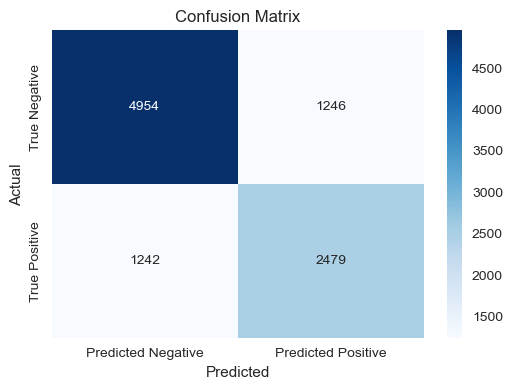

In [49]:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Prediction accuracy of 75% 

### logistic regression model

In [50]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(solver='lbfgs')

# Set the parameter grid for GridSearchCV to find the best regularization strength 'C'
param_grid = {'C': np.arange(0.5, 5.1, 0.1)}

# Instantiate GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(logreg, param_grid, cv=5)

# Fit the model on the training data
grid.fit(X_train, np.ravel(y_train))

# Print the best parameter (C) found and the best cross-validation score
print("Best parameter (C):", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

Best parameter (C): {'C': 4.599999999999999}
Best cross-validation score: 0.750396808714392


In [51]:
grid.best_estimator_.C

4.599999999999999

In [52]:
# Initialize Logistic Regression with the best 'C' value found from the grid search
logreg_coef = LogisticRegression(C=grid.best_estimator_.C)

# Fit the model on the training data
logreg_coef.fit(X_train, y_train)

# Create a DataFrame to store the feature names and their corresponding coefficients
df_coef = pd.DataFrame(zip(list(df_features.columns), logreg_coef.coef_[0]),
                       index=range(df_features.columns.shape[0]),
                       columns=['Feature', 'Coefficient'])

# Display the coefficients DataFrame
df_coef

,Feature,Coefficient
0,trips_in_first_30_days,0.081114
1,avg_rating_of_driver,-0.464652
2,avg_surge,2.771732
3,surge_pct,-1.702754
4,weekday_pct,-0.249728
5,avg_dist,0.154315
6,avg_rating_by_driver,-1.321497
7,city_Astapor,-0.759127
8,city_King's Landing,1.134855
9,city_Winterfell,-0.243380


In [53]:
print(np.mean(cross_val_score(grid,X_test,np.ravel(y_test),cv=5)))

0.7426670289266271


The models perform almost identically using Logistic Regression for our classifier.

## Conclusion

In conclusion, our analysis has uncovered some valuable insights from the dataset that can guide future business strategies. We developed a predictive model with 75% accuracy, which can be used for future user activity predictions. More importantly, the model provided us with actionable insights into how certain factors influence user activity. The Random Forest model helped identify key features, and Logistic Regression highlighted the effects of these features, providing a clear picture of what impacts user retention after 6 months.

The most important insights suggest that encouraging users to be more active on weekends and take more trips during their first 30 days on the app will likely improve long-term engagement. Interestingly, while the distance driven per trip in the first 30 days correlates with higher activity, inactive users also tend to have a higher average distance, making it unclear whether increasing trip distances would be beneficial. Additionally, the model shows that higher ratings by drivers are associated with lower chances of remaining active, suggesting that drivers should avoid inflating ratings for new riders. By leveraging these insights, the company can implement targeted strategies to increase the number of active users and, ultimately, drive more revenue.